In [6]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import os 
import sys
import pandas as pd
from sklearn import preprocessing
from sklearn.impute import MissingIndicator
from sklearn.impute import SimpleImputer


#----------------------------------------------------------------------------------------------
data      =  open("elemental_features_reduced.dat", "r")
null      =  data.readline()
tags      =  data.readline()
features  =  data.readlines()
array = ['0', '0', '0', '0', '0','0', '0','0','0','0','0','0','0','0','0','0','0','0','0', '0','1', '2', '3', '5', '5', '6', '7', '8', '10', '10', '0', '0', '0', '0', '0','0', '0','0','1', '2', '3', '5', '5', '6', '7', '8', '10', '10','0', '0', '0', '0', '0','0', '0','0','0','0','0','0','0','0','0','0','0','0','0', '0', '0', '0', '0', '2', '3', '5', '5', '6', '7', '8', '10', '10','0', '0', '0', '0', '0','0', '0','0','0','0','0','0','0','0','0','0','0','0','0', '0','0', '0']
array= np.asarray(array)
X = []
symbols = []

for _features in features:
       	_features  =  _features.split()
        temp = []
        symbols.append(_features[0])
        for a in _features[1:]:
            if a == 'nan':
                temp.append(np.NAN)
            else:
                temp.append(a)
        X.append(temp)
#        X.append(array)

X = np.asarray(X)
#X = np.where(X == 'nan', np.nan, X)
#print(array)
#print(X)
# print(len(array))
# print(len(symbols))
X = np.hstack((X, np.atleast_2d(array).T))
print(array)
print(X[20])
print(symbols[20])
data.close()

['0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '1' '2' '3' '5' '5' '6' '7' '8' '10' '10' '0' '0' '0' '0' '0' '0'
 '0' '0' '1' '2' '3' '5' '5' '6' '7' '8' '10' '10' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '2'
 '3' '5' '5' '6' '7' '8' '10' '10' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0']
['21' '4' '3' '44.9559' '1.36' '1.19' '18.1' '633.1' '2.15' '1.59' '1814'
 '3103' '0.568' '25.52' '2.985' '16' '304.8' '0.158' '184' '0.000015061'
 '1']
Sc


In [7]:
X_scaled = preprocessing.scale(X)

imp = SimpleImputer(missing_values=np.nan, strategy='median')

imp.fit(X_scaled)

X_scaled = imp.transform(X_scaled)

print(X_scaled)
X_scaled.mean(axis=0)

[[-1.71515235 -2.54267005 -1.20594103 ... -1.85187608  1.56864261
  -0.54478226]
 [-1.68118893 -2.54267005  1.74342673 ... -2.2348942   3.48294134
  -0.54478226]
 [-1.64722552 -1.90387117 -1.20594103 ...  0.13285423 -0.34275923
  -0.54478226]
 ...
 [ 1.64722552  1.29012323 -0.85895658 ...  0.10673936 -0.3421225
  -0.54478226]
 [ 1.68118893  1.29012323 -0.85895658 ...  0.10673936 -0.3421225
  -0.54478226]
 [ 1.71515235  1.29012323 -0.85895658 ...  0.10673936 -0.3421225
  -0.54478226]]


array([ 0.00000000e+00,  1.39322105e-16, -6.96610525e-17, -1.08845395e-16,
       -4.99779874e-03, -4.08651909e-02, -5.11874837e-02, -7.11304654e-16,
        3.74428157e-16,  2.24221513e-16, -1.80750362e-03,  1.27992970e-02,
       -3.70185223e-02, -1.51106153e-02, -9.95982912e-03, -2.32165646e-02,
       -2.41082156e-03,  1.39322105e-16,  1.88363576e-02, -2.34789952e-02,
       -8.70763157e-17])

In [8]:
H_features = []

index = symbols.index('H')

H_features = X_scaled[index]

#print(H_features)

list_of_metals = ["Sc","Ti","Pt","Ag","Au","Cr","Mn","Fe","Co","Ni","Zn","V","Cu","Mg","Al","Sn","In","Si","Ge","As","Bi","Nb","W","Ta","Mo","Re","Ru","Os","Rh","Ir","Pd"]   

list_of_shell_metals = ["Sc","Ti","Pt","Ag","Au","Cr","Mn","Fe","Co","Ni","Zn","V","Cu","Mg","Al","Sn","In","Si","Ge","As","Bi","Nb","W","Ta","Mo","Re","Ru","Os","Rh","Ir","Pd"] 
n = len(list_of_metals)
#with open('/home/sakshi/documents/machine_learning/Work/structures2/energy.csv','r') as f:
#    list_of_lines = f.readlines()
   # print(list_of_lines)
#    for i in list_of_lines:
#        r = i.split('_')
#        print(r)
li =[]        
for i in list_of_metals:
    index = symbols.index(i)
    i_features = X_scaled[index]
   # final_features = [x + [0] for x in i_features]
   # print(final_features)
    li.append(i_features)
    
M = np.asarray(li) #core  
print(np.shape(M))
padded_ones = np.ones((M.shape[0], 1))
padded_array = np.zeros((M.shape[0], 1))
N = np.concatenate((M, padded_ones), axis=1) #shell
M = np.concatenate((M, padded_array), axis=1) # core
print(np.shape(M))
print(np.shape(N))    
print(N)
#padded_array[:shape[1]] = M



(31, 21)
(31, 22)
(31, 22)
[[-1.03588409e+00 -6.26273412e-01 -8.58956584e-01 -1.04285228e+00
  -5.66310420e-01 -8.48714561e-01 -7.24207655e-01 -4.32578912e-01
  -4.30540922e-02  3.01948601e-01  6.00288315e-01  3.45248106e-01
  -3.76118858e-02 -1.37280317e-01 -8.80305928e-01  1.55567601e-01
   2.24750842e-01 -4.96234245e-01  4.28822787e-01 -3.42402288e-01
  -2.17912904e-01  1.00000000e+00]
 [-1.00192068e+00 -6.26273412e-01 -6.85464363e-01 -1.00518160e+00
  -2.80913031e-01 -6.12531228e-01 -8.55173742e-01 -3.52402832e-01
  -1.56383574e-01  2.00964127e-02  7.43170227e-01  6.35143857e-01
  -6.45110307e-02 -2.00349870e-01 -6.11006439e-01  3.43977501e-01
   8.24962619e-01 -4.17862453e-01  2.89543467e-01 -3.43160224e-01
   1.08956452e-01  1.00000000e+00]
 [ 9.00030439e-01  6.51324349e-01  3.55488962e-01  8.99782114e-01
   8.92387348e-01 -1.89887368e-01  1.61073059e+00  3.06476075e-01
  -9.97188329e-02 -4.41116259e-01  8.56125691e-01  9.76421570e-01
  -3.03546614e-01 -9.06636915e-02  2.32315482

In [9]:
import math
import numpy as np
n = len(list_of_metals)

fp = open('./energy.csv', 'r')
list_of_lines = fp.readlines()
#print(list_of_lines)
E_list =[]
E = np.zeros((n,n))
for i in list_of_lines:
    r = i.split('  ')
    t = r[0].split('_')
    a = list_of_metals.index(t[0])  #core
    b = list_of_metals.index(t[1])  #shell
    E[a,b] = r[1]
E = E.astype('float128')
# ind = 1.0*(E != 0.0)
# E = ind*np.exp(E)
E = E/4.0
print(E)

[[ 0.00000000e+00  0.00000000e+00 -3.13362250e-01  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.52632500e-02
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  2.07299250e-01  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00 -3.50640000e-02  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -5.31849750e-01  0.00000000e+00  0.00000000e+00  1.32814500e-01
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00 -2.09366750e-01
   0.00000000e+00  0.00000000e+00  0.00000000e+00 -4.05135750e-01
   0.00000000e+00  0.0000

In [19]:
import numpy as np
import math
from scipy.sparse import rand as sprand
import torch
from scipy.special import logit
from torch.autograd import Variable
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt


n = 22
m = 22
n_features = 22
r = 5

len_test = 115


rows, cols = E.nonzero()
print(rows, cols)
p = np.random.permutation(len(rows))
rows, cols = rows[p], cols[p]
rows_test, cols_test = rows[len_test:len(rows)], cols[len_test:len(rows)]
print(rows_test,cols_test)
rows, cols = rows[0:len_test], cols[0:len_test]
print(rows,cols)


class Dataset(torch.utils.data.Dataset):
    def __init__(self, rows, cols, E, M, N):
        'Initialization'
        self.rows = rows
        self.cols = cols
        self.E = E
        self.M = M
        self.N = N

    def __len__(self):
        'Denotes the total number of samples'
        return len(self.rows)

    def __getitem__(self, index):
        'Generates one sample of data'

        # Load data and get label
        row = self.rows[index]
        column = self.cols[index]
        X_core = torch.FloatTensor(self.M[row,:])
        X_shell = torch.FloatTensor(self.N[column,:])
        y = torch.FloatTensor([self.E[row, column]])

        return X_core, X_shell, index, y

    
    
params = {'batch_size': 5,
          'shuffle': True,
          'num_workers': 0} 

train_set = Dataset(rows, cols, E, M, N)
#train_Set = torch.tensor(train_set, dtype = torch.float, requires_grad = True)
train_loader = torch.utils.data.DataLoader(train_set, **params)
test_set = Dataset(rows_test, rows_test, E, M, N)
#test_Set = torch.tensor(test_set, dtype = torch.float, requires_grad = True)
test_loader = torch.utils.data.DataLoader(test_set, **params)



def init_weights(m):
 #   if type(m) == torch.nn.Embedding:
    torch.nn.init.xavier_uniform_(m.weight)
        

class MatrixFactorization(torch.nn.Module):
    def __init__(self, n_features_core, n_features_shell, n_factors):
        super().__init__()
        self.lin1 = torch.nn.Linear(n_features_core, 10)
        self.lin3 = torch.nn.Linear(10, 10)
        self.batchnorm1 = torch.nn.BatchNorm1d(10)
        self.core_factors = torch.nn.Linear(10, n_factors*2)
       
        self.lin2 = torch.nn.Linear(n_features_shell, 10)
        self.lin4 = torch.nn.Linear(10, 10)
        self.batchnorm2 = torch.nn.BatchNorm1d(10)
        self.shell_factors = torch.nn.Linear(10, n_factors*2)

        self.lin5 = torch.nn.Linear(n_factors*4, 5)
        self.lin6 = torch.nn.Linear(5, 5)
        self.lin7 = torch.nn.Linear(5, 1)

    def forward(self, X_core, X_shell):
#         x = self.batchnorm1(self.lin1(shell))
        x = self.lin1(X_core)
        x = self.lin3(x)
        x = self.core_factors(x)
      #  print(x.shape)
#         y = self.batchnorm2(self.lin2(core))
        y = self.lin2(X_shell)
        y = self.lin4(y)
        y = self.shell_factors(y)
      #  print(y.shape)
#        z = self.lin3(torch.abs(y-x))
#         print(x.shape, y.shape)
        z = self.lin5(torch.cat([x,y], dim=1))
#         z = self.lin5(x*y)
#         z = torch.linalg.norm(x-y)
#        z = self.lin3((x-y)**2).sum(axis=0)
        z = self.lin6(z)
        z = self.lin7(z)
        return x,y,z

#print(len(x))

model = MatrixFactorization(n, m, r)
model.train()
init_weights(model.core_factors)
init_weights(model.shell_factors)

loss_func = torch.nn.MSELoss(reduction = 'sum')
optimizer = torch.optim.Adam(model.parameters(), lr=0.001) # learning rate 0.01


for iter in range(200):

    #for row, col in zip(*(rows, cols)):
    for X_core, X_shell, index, true in train_loader:
        # Turn data into variables
        #print(row, col)

#        true = torch.FloatTensor(np.float(y))
#         #print(true)
#        shell = torch.FloatTensor(X_shell)   #shell
#         #print(shell)
#        core = torch.FloatTensor(X_core)   #core
#         #print(core)

        # Predict and calculate loss

        x,y, prediction = model(X_core, X_shell)
        loss = loss_func(prediction, true)

        # Backpropagate
        loss.backward()

        # Update the parameters
        optimizer.step()
        optimizer.zero_grad()

    

    with torch.set_grad_enabled(False):
        train_loss = 0.0

        for X_core, X_shell, index, true in train_loader:
            x,y,prediction = model(X_core, X_shell)
            train_loss += loss_func(prediction, true)

        train_loss /= len(rows)

        
        test_loss = 0.0
          #rows = [2,1,1,1]
        #  columns = [2,2,5,1]
        
        for row, col in zip(*(rows_test, cols_test)):
            true = torch.FloatTensor([E[row, col]])
            core = torch.FloatTensor([M[row,:]])
            shell = torch.FloatTensor([N[col,:]])

            # Predict and calculate loss
            x,y,prediction = model(core, shell)
            test_loss += loss_func(prediction, true)
        test_loss /= len(rows_test)


#         test_loss = 0.0
#         predictions = []
#         indices = []
#         for X_shell, X_core, index, true in test_loader:
#             indices.extend(index)
#             prediction = model(X_shell, X_core)
#             true = torch.FloatTensor(E[rows_test[index], cols_test[index]])
#             print(prediction, true, index)
#             test_loss += loss_func(prediction, true)
    
#             for i in range(len(prediction)):
#                 predictions.append(prediction[i].item())
#         test_loss /= len(rows_test)

        print(f"Iter {iter:.3f}, train loss {train_loss:.3f}")
        print(f"Iter {iter:.3f}, test loss {test_loss:.3f}")

#Embedding = model.shell_factors(M[i-\\


[ 0  0  0  0  1  1  1  1  2  2  2  2  2  3  3  3  3  4  4  4  4  4  4  4
  4  4  4  4  4  4  5  5  5  5  6  6  6  6  7  7  7  7  7  7  8  8  8  8
  8  8  8  8  9  9  9  9  9 10 10 10 11 11 11 11 11 12 12 12 12 12 12 12
 13 13 13 13 14 14 14 15 15 15 15 15 16 16 16 16 16 17 17 17 17 18 18 18
 18 18 19 19 20 20 21 21 21 21 21 23 23 23 23 23 24 25 25 26 26 26 26 27
 27 27 27 28 28 28 29 29 29 29 30 30 30] [ 2  7 14 21 12 15 23 27  1  8 14 19 30  4 14 19 22  0  2  3  8 14 15 16
 18 22 26 28 29 30 11 16 24 27  5  7 16 23  3  4 11 17 27 28  0  5  7 11
 16 22 24 28  2  8 11 16 28  3  9 17  2  6 16 20 30  2  6 10 14 21 27 29
  7 11 15 21  7 10 18  1  5  7 17 29  1  7  8 10 23  1 10 19 23  1  6 17
 26 29  9 18 22 23  3  4 10 18 28  1  2  4  9 30 28 24 28 10 16 19 20  3
  4 15 24  9 18 22 10 12 15 22 12 13 16]
[ 4  2  6 18 21  1  8 29  9 30 11 27 29 27  6  7  8 23] [ 8 19  5  1  3 15 22 22  8 12  2  4 15 15 16  3 16  2]
[ 8  8  9 11  1  7  4 20 14 13  5  5  5 12  4 21  8 12  4  7  0 21 18 23
  5

/opt/anaconda3/lib/python3.8/site-packages/torch/nn/modules/loss.py:446: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Iter 2.000, train loss 0.137
Iter 2.000, test loss 0.069
Iter 3.000, train loss 0.120
Iter 3.000, test loss 0.080
Iter 4.000, train loss 0.115
Iter 4.000, test loss 0.086
Iter 5.000, train loss 0.109
Iter 5.000, test loss 0.084
Iter 6.000, train loss 0.104
Iter 6.000, test loss 0.085
Iter 7.000, train loss 0.101
Iter 7.000, test loss 0.082
Iter 8.000, train loss 0.097
Iter 8.000, test loss 0.074
Iter 9.000, train loss 0.094
Iter 9.000, test loss 0.076
Iter 10.000, train loss 0.090
Iter 10.000, test loss 0.078
Iter 11.000, train loss 0.087
Iter 11.000, test loss 0.067
Iter 12.000, train loss 0.084
Iter 12.000, test loss 0.074
Iter 13.000, train loss 0.081
Iter 13.000, test loss 0.070
Iter 14.000, train loss 0.078
Iter 14.000, test loss 0.068
Iter 15.000, train loss 0.076
Iter 15.000, test loss 0.066
Iter 16.000, train loss 0.073
Iter 16.000, test loss 0.072
Iter 17.000, train loss 0.071
Iter 17.000, test loss 0.066
Iter 18.000, train loss 0.070
Iter 18.000, test loss 0.056
Iter 19.000, 

Iter 140.000, train loss 0.045
Iter 140.000, test loss 0.052
Iter 141.000, train loss 0.045
Iter 141.000, test loss 0.052
Iter 142.000, train loss 0.047
Iter 142.000, test loss 0.050
Iter 143.000, train loss 0.045
Iter 143.000, test loss 0.051
Iter 144.000, train loss 0.050
Iter 144.000, test loss 0.055
Iter 145.000, train loss 0.046
Iter 145.000, test loss 0.052
Iter 146.000, train loss 0.046
Iter 146.000, test loss 0.049
Iter 147.000, train loss 0.045
Iter 147.000, test loss 0.050
Iter 148.000, train loss 0.046
Iter 148.000, test loss 0.053
Iter 149.000, train loss 0.046
Iter 149.000, test loss 0.047
Iter 150.000, train loss 0.048
Iter 150.000, test loss 0.055
Iter 151.000, train loss 0.045
Iter 151.000, test loss 0.049
Iter 152.000, train loss 0.046
Iter 152.000, test loss 0.049
Iter 153.000, train loss 0.045
Iter 153.000, test loss 0.052
Iter 154.000, train loss 0.046
Iter 154.000, test loss 0.050
Iter 155.000, train loss 0.045
Iter 155.000, test loss 0.052
Iter 156.000, train loss

[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
Core metal:Sc
Shell metal:Zn
True:0.0
Predicted:tensor([[-1.3233]], grad_fn=<AddmmBackward>)


Core metal:Ti
Shell metal:Zn
True:0.0
Predicted:tensor([[-1.3486]], grad_fn=<AddmmBackward>)


Core metal:Pt
Shell metal:Zn
True:0.0
Predicted:tensor([[-1.5648]], grad_fn=<AddmmBackward>)


Core metal:Ag
Shell metal:Zn
True:0.0
Predicted:tensor([[-1.9309]], grad_fn=<AddmmBackward>)


Core metal:Au
Shell metal:Zn
True:0.0
Predicted:tensor([[-1.7697]], grad_fn=<AddmmBackward>)


Core metal:Cr
Shell metal:Zn
True:0.0
Predicted:tensor([[-1.4843]], grad_fn=<AddmmBackward>)


Core metal:Mn
Shell metal:Zn
True:0.0
Predicted:tensor([[-1.4662]], grad_fn=<AddmmBackward>)


Core metal:Fe
Shell metal:Zn
True:0.0
Predicted:tensor([[-1.4912]], grad_fn=<AddmmBackward>)




<Figure size 800x800 with 0 Axes>

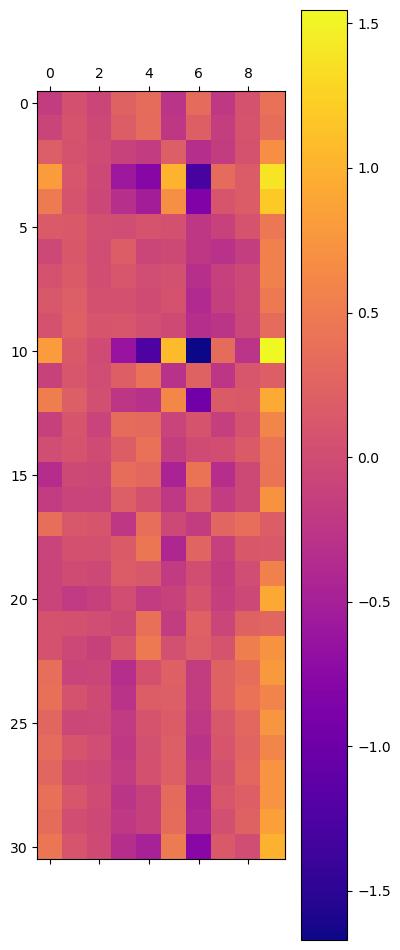

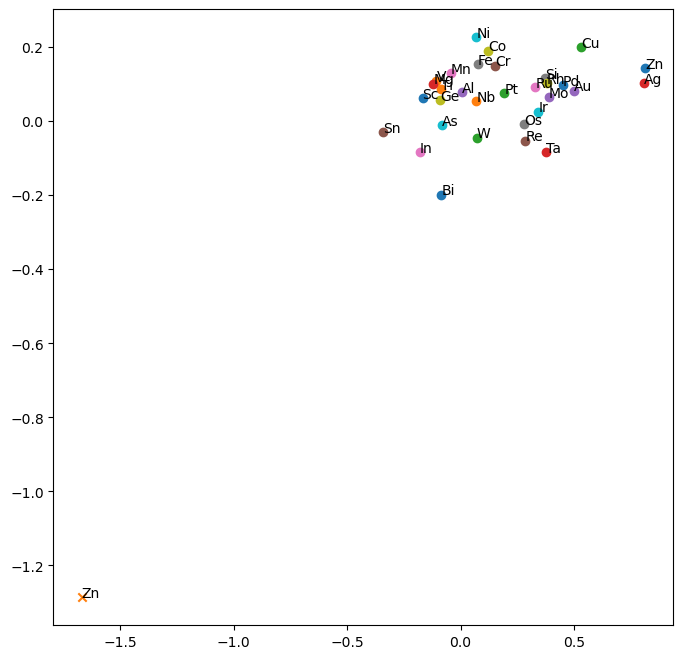

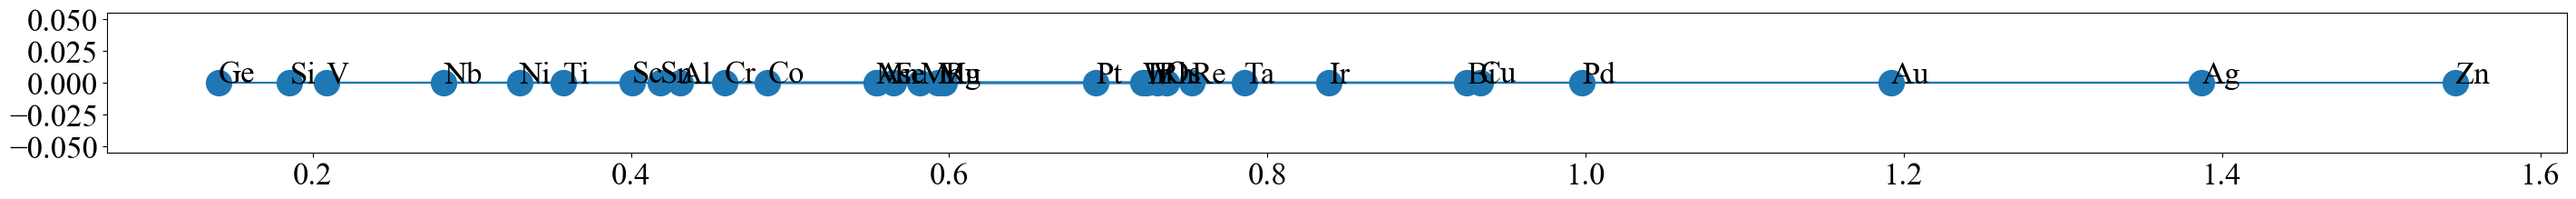

In [20]:
from sklearn.manifold import TSNE
import csv
import matplotlib.pyplot as pp
test_loss = 0.0
  #rows = [2,1,1,1]
#  columns = [2,2,5,1]

X_core = []
X_shell = []
P = []
X_core_name = []
X_shell_name = []

target_metal = list(10*np.ones(31, dtype = int))
all_metals = list(range(31))
print(target_metal)
print(all_metals)

di_core = {}
di_shell = {}

model.eval()

# for row, col in zip(*(rows_test, cols_test)):
for row, col in zip(*(all_metals,target_metal)):
    true = torch.FloatTensor([E[row, col]])
    core = torch.FloatTensor([M[row,:]])
    shell = torch.FloatTensor([N[col,:]])
    
#     print(core)
#     print(shell)
    # Predict and calculate loss
    x,y,prediction = model(core, shell)
    print('Core metal:'+list_of_metals[row])
    print('Shell metal:'+list_of_metals[col])
    print('True:'+str(E[row, col]))
    print('Predicted:'+str(prediction))
    print('\n')
    
    
#    print(prediction)
    train_loss += loss_func(prediction, true)
    X_shell.extend(x.tolist())
    X_core.extend(y.tolist())
    P.extend(prediction.tolist())
    X_core_name.append(list_of_metals[row])
    X_shell_name.append(list_of_metals[col])
    di_core[list_of_metals[row]] = x.tolist()
    di_shell[list_of_metals[col]] = y.tolist()
P = sum(P, [])
print(P)

Embedding_core = []
for i in X_core:
    if i not in Embedding_core:
        Embedding_core.append(i)
Embedding_shell = []
for i in X_shell:
    if i not in Embedding_shell:
        Embedding_shell.append(i)
Core_name = []
for i in X_core_name:
    if i not in Core_name:
        Core_name.append(i)
Shell_name = []
for i in X_shell_name:
    if i not in Shell_name:
        Shell_name.append(i)        

Core_name = np.asarray(Core_name)
Shell_name = np.asarray(Shell_name)
# print(Shell_name)
# print(Core_name)
train_loss /= len(rows)

metal_list_core = list(di_core.keys())
metal_list_shell = list(di_shell.keys())
#print(metal_list_core)
#print(metal_list_shell)
tsne_arr = []
ts = []
for i in metal_list_core:
    tsne_arr.extend(di_core[i])
    ts.extend(di_core[i])
for i in metal_list_shell:
    tsne_arr.extend(di_shell[i])
    

tsne_arr = np.asarray(tsne_arr)
ts = np.asarray(ts)
fits = tsne_arr
#fits = TSNE().fit_transform(tsne_arr)
fit = ts

#print(fits)
print(len(fit))
plt.figure(figsize=(8,8)) 
plt.matshow(fit, cmap="plasma")
plt.colorbar()
plt.savefig('correlation-Mn.eps', format='eps')
plt.show()





plt.figure(figsize=(8,8)) 
#ax = fig.add_subplot(projection='polar')
for i in range(len(metal_list_core)):
    plt.scatter(fits[i,0], fits[i,1])
    plt.annotate(metal_list_core[i], (fits[i,0], fits[i,1]))
X = []
Y = []

for i in range(len(metal_list_core), len(metal_list_core)+len(metal_list_shell)):
    plt.scatter(fits[i,0], fits[i,1], marker='x')
    plt.annotate(metal_list_shell[i - len(metal_list_core)], (fits[i,0], fits[i,1]))
    

plt.show()
#print(fit)
fields = ['X', 'Y', 'p', 'metal']
F = np.insert(fit, 2, P, axis=1)
#print(metal_list_core)
#F = np.concatenate((F, metal_list_core), axis=1)
#print(F)
F = np.column_stack((F,metal_list_core))
#print(F)    
with open('plot', 'w') as f:
      
    # using csv.writer method from CSV package
    write = csv.writer(f)
      
    write.writerow(fields)
    write.writerows(F)
f.close()
#print(f)

data = pd.read_csv('plot')
val=0
# data = data.drop(10)
# data = data.drop(3)
# data = data.drop(4)
# data = data.drop(12)
#print(data)
r = list(data.metal.values)
#print((r))
z=data.p.values
pp.figure(figsize=(35,2)) 
pp.plot(z, np.zeros_like(z) + val, marker='o', ms=20)
for i in range(len(z)):
    csfont = {'fontname':'Times New Roman'}
    text = plt.annotate(r[i], (z[i], 0),**csfont)
    text.set_fontsize(25)

pp.xticks(fontsize=25, **csfont)
pp.yticks(fontsize=25, **csfont)
#pp.xlim(-0.8, -0.5)


pp.savefig('27-new-Os-line.eps', format='eps')
pp.show()



[-16.625216  -56.28931    40.769016   -4.880727  -33.57388    62.935196
 -32.513897  -39.9045     19.982853   33.900803   91.93237    64.80832
  39.619465   -1.0545975  58.517063   87.00663    56.323776   62.310566
  23.420946  -12.359578   33.242554  -65.39069    -0.3010732  28.948317
  89.089554    6.8876967  11.113571 ]
[-44.31118    36.161808  -44.113075  -19.92404   -68.67291     5.7306385
 -17.879025   10.3662815 -26.660135   17.465242   -3.3851125 -62.93414
  -9.666668  -80.01494    64.22111    32.08627    33.795704  -24.742619
  78.12476     6.5341063 -76.4922     -6.899302   57.258095   46.329124
 -38.13584    27.684721  -52.148087 ]
[-0.01020446 -0.02731156 -0.36838588 -0.16221854 -0.10265604 -0.17278728
 -0.21526572 -0.20083389 -0.01698342 -0.15868297 -0.1149554   0.00113738
 -0.11315101 -0.14055634 -0.01169285 -0.15460399 -0.18399099 -0.11064428
 -0.25040486 -0.31492457 -0.24251279 -0.27474907 -0.27529564 -0.32335052
 -0.33549508 -0.41285625 -0.41034022]


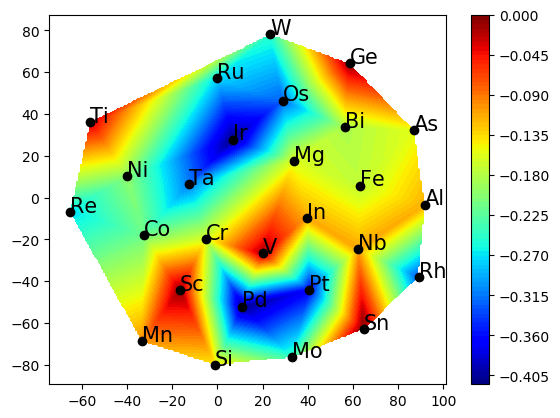

In [16]:
#X = data.iloc[:,0]
#print(X)
#Y = data.iloc[:,1]
#print(Y)
#Z = data.iloc[:,2]
#print(Z)
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.mlab as ml
import scipy
import matplotlib.tri as tri
#from sklearn import preprocessing
#from matplotlib.mlab import griddata

#data= pd.read_csv('3_class_blended.csv')

#data.shape
comp=data.iloc[:,0:1]
#print(comp)
name=comp.columns
x=comp.values
df = pd.DataFrame(x, columns=name)
comp = df.copy()
#print(comp)

gw=data.iloc[:,2]
gw=pd.DataFrame(gw)
#print(gw)
j=0
i=1
r = list(data.metal.values)
x=comp.iloc[:,0].values
y=data.iloc[:,1].values
print(x)
print(y)
z=gw.iloc[:,0].values
z = z.astype('float64')
# x_l=comp.columns[i]
# y_l=comp.columns[j]
print(z)
xmin=np.min(x)
xmax=np.max(x)
ymin=np.min(y)
ymax=np.max(y)
xi = np.linspace(xmin, xmax, 200)
yi = np.linspace(ymin, ymax, 200)
#print(xi)
# # grid the data.
triang = tri.Triangulation(x, y)
interpolator = tri.LinearTriInterpolator(triang, z)
Xi, Yi = np.meshgrid(xi, yi)
zi = interpolator(Xi, Yi)
#zi = griddata(x,y,z,xi,yi,interp='linear')
plt.contourf(xi,yi,zi,100,cmap=plt.cm.jet)

plt.colorbar();
# plt.xlabel(name[i])
# plt.ylabel(name[j])
plt.scatter(x,y, c='black') 
for i in range(len(r)):
    csfont = {'fontname':'Times New Roman'}
    text = plt.annotate(r[i], (x[i], y[i]),**csfont)
    text.set_fontsize(15)
plt.savefig("contourCo.png") 
plt.show()
 


In [23]:
import numpy as np
import math
from scipy.sparse import rand as sprand
import torch
from scipy.special import logit
from torch.autograd import Variable
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss

def init_weights(m):
    if type(m) == torch.nn.Embedding:
        torch.nn.init.xavier_uniform_(m.weight)
        

class MatrixFactorization(torch.nn.Module):
    
    def __init__(self, n_features_shell, n_features_core, n_factors=20):
        super().__init__()
        self.shell_factors = torch.nn.Embedding(n_features_shell, 
                                               n_factors, sparse = True)
        self.core_factors = torch.nn.Embedding(n_features_core, 
                                               n_factors, sparse = True)
        self.lin1 = torch.nn.Linear(5, 10)
        self.lin2 = torch.nn.Linear(5, 10)
        
        self.lin3 = torch.nn.Linear(10, 1)
        
        
    def forward(self, shell, core):
#         print(self.shell_factors(shell).shape)
        X_shell = self.shell_factors(shell)
        X_core = self.core_factors(core)
        x = self.lin1(X_shell)
        y = self.lin2(X_core)
        z = x*y
        z = self.lin3(z)
        return x, y, z
#         print(X_shell.shape)
#         return (self.shell_factors(shell) * self.core_factors(core)).sum(1)
    


n = 31
m = 31
n_features = 21
r = 5

model = MatrixFactorization(n, m, r)
init_weights(model.shell_factors)
init_weights(model.core_factors)

loss_func = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001) # learning rate 0.01

rows, cols = E.nonzero()
p = np.random.permutation(len(rows))
rows, cols = rows[p], cols[p]
print(rows,cols)
rows_test, cols_test = rows[105:len(rows)], cols[105:len(rows)]
print(rows_test,cols_test)
rows, cols = rows[0:105], cols[0:105]
print(rows,cols)

for iter in range(200):

    for row, col in zip(*(rows, cols)):
        
        # Turn data into variables
        #print(row, col)

        true = torch.FloatTensor([E[row, col]])
        #print(true)
        shell = torch.LongTensor([row])
        core = torch.LongTensor([col])

        # Predict and calculate loss

        x,y,prediction = model(shell, core)
        loss = loss_func(prediction, true)

        # Backpropagate
        loss.backward()

        # Update the parameters
        optimizer.step()
        optimizer.zero_grad()


    train_loss = 0
    for row, col in zip(*(rows, cols)):
        true = torch.FloatTensor([E[row, col]])
        shell = torch.LongTensor([row])
        core = torch.LongTensor([col])


        # Predict and calculate loss
        x,y,prediction = model(shell, core)
  #      print(prediction)
        train_loss += loss_func(prediction, true)
    train_loss /= len(rows)
  #  train_log_loss = log_loss(true,prediction)
    
    test_loss = 0
    for row, col in zip(*(rows_test, cols_test)):
        true = torch.FloatTensor([E[row, col]])
        shell = torch.LongTensor([row])
        core = torch.LongTensor([col])

        # Predict and calculate loss
        x,y,prediction = model(shell, core)
#         print(prediction)
        test_loss += loss_func(prediction, true)
    test_loss /= len(rows_test)
 #   test_log_loss = log_loss(true,prediction)

    print(f"Iter {iter:.3f}, train loss {train_loss:.3f}")
    print(f"Iter {iter:.3f}, test loss {test_loss:.3f}")
  #  print(train_log_loss)
#    print(test_log_loss)




[30 12 30  0 27  3 12 17  5 13  7 23 27 29 13 15 18 12  3 28 19 26 14 20
 29  9 26 12 21  5 11 13 14 16 15 11  6 15 24 23  6 17  4 18  7 19  4  4
  2 11  0  1  7  8  0  1 20  3  4 27  8  4 10  4 21 16 21 23 16  4 12 12
 18 17 17 28 10  4 14  8  4  9  2  2 30 23  4 25 15  4 26  0  9 18  6 18
 16  6 21 26  4  2  7  8 28 15  7  1  3 12  8  2 23  4  9  8  5 13 25  8
 11  1 16 29 11] [13 21 16  2  4 14  2 10 16 15  3  4  3 22 21 29  1 14 19 18  9 19  7 23
 15  2 10 10  4 11 30 11 18  1  1 20 23  7 28  1  5  1  2  6 17 18  0 18
  1  6 21 23  4 11 14 12 22  4 16 24 24 28 17 29 18 10 10  9 23  3 27  6
 26 19 23  9  3 30 10  7 22  8  8 14 12 30 15 28  5 14 20  7 28 29 16 17
  8  7  3 16 26 19 28  0 22 17 27 15 22 29 22 30  2  8 16 16 24  7 24  5
  2 27  7 12 16]
[15  7  1  3 12  8  2 23  4  9  8  5 13 25  8 11  1 16 29 11] [17 27 15 22 29 22 30  2  8 16 16 24  7 24  5  2 27  7 12 16]
[30 12 30  0 27  3 12 17  5 13  7 23 27 29 13 15 18 12  3 28 19 26 14 20
 29  9 26 12 21  5 11 13 14 16 15 11  6

/opt/anaconda3/lib/python3.8/site-packages/torch/nn/modules/loss.py:446: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Iter 1.000, train loss 0.275
Iter 1.000, test loss 0.056
Iter 2.000, train loss 0.246
Iter 2.000, test loss 0.048
Iter 3.000, train loss 0.228
Iter 3.000, test loss 0.045
Iter 4.000, train loss 0.217
Iter 4.000, test loss 0.046
Iter 5.000, train loss 0.209
Iter 5.000, test loss 0.049
Iter 6.000, train loss 0.204
Iter 6.000, test loss 0.052
Iter 7.000, train loss 0.201
Iter 7.000, test loss 0.055
Iter 8.000, train loss 0.199
Iter 8.000, test loss 0.058
Iter 9.000, train loss 0.197
Iter 9.000, test loss 0.061
Iter 10.000, train loss 0.196
Iter 10.000, test loss 0.063
Iter 11.000, train loss 0.195
Iter 11.000, test loss 0.065
Iter 12.000, train loss 0.195
Iter 12.000, test loss 0.067
Iter 13.000, train loss 0.194
Iter 13.000, test loss 0.068
Iter 14.000, train loss 0.194
Iter 14.000, test loss 0.069
Iter 15.000, train loss 0.194
Iter 15.000, test loss 0.070
Iter 16.000, train loss 0.194
Iter 16.000, test loss 0.071
Iter 17.000, train loss 0.193
Iter 17.000, test loss 0.071
Iter 18.000, tr

Iter 139.000, train loss 0.148
Iter 139.000, test loss 0.053
Iter 140.000, train loss 0.147
Iter 140.000, test loss 0.053
Iter 141.000, train loss 0.147
Iter 141.000, test loss 0.053
Iter 142.000, train loss 0.146
Iter 142.000, test loss 0.053
Iter 143.000, train loss 0.145
Iter 143.000, test loss 0.053
Iter 144.000, train loss 0.144
Iter 144.000, test loss 0.053
Iter 145.000, train loss 0.144
Iter 145.000, test loss 0.053
Iter 146.000, train loss 0.143
Iter 146.000, test loss 0.053
Iter 147.000, train loss 0.142
Iter 147.000, test loss 0.053
Iter 148.000, train loss 0.141
Iter 148.000, test loss 0.053
Iter 149.000, train loss 0.141
Iter 149.000, test loss 0.052
Iter 150.000, train loss 0.140
Iter 150.000, test loss 0.052
Iter 151.000, train loss 0.139
Iter 151.000, test loss 0.052
Iter 152.000, train loss 0.138
Iter 152.000, test loss 0.052
Iter 153.000, train loss 0.137
Iter 153.000, test loss 0.052
Iter 154.000, train loss 0.137
Iter 154.000, test loss 0.052
Iter 155.000, train loss

In [141]:
from sklearn.manifold import TSNE
i = 0
li = []
for i in range(0,31):
    Embedding = model.shell_factors(torch.LongTensor([i]))
    E = Embedding.cpu().detach().numpy()    
    i = i + 1
    F = np.concatenate(E)
    F_i = F.tolist()
    li.append(F_i)
#print(li)
L = np.array(li)
#print(L)
#print(prediction)
l = []
for i in range(0,31):
    Embedding_2 = model.core_factors(torch.LongTensor([i]))
    E_2 = Embedding.cpu().detach().numpy()    
    i = i + 1
    F_2 = np.concatenate(E)
    F_i2 = F.tolist()
    l.append(F_i2)
#print(l)
L_2 = np.array(l)
#print(L)
 
    